<a href="https://colab.research.google.com/github/asrafulasf72/Data-Mining-Algorithm/blob/main/K_means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

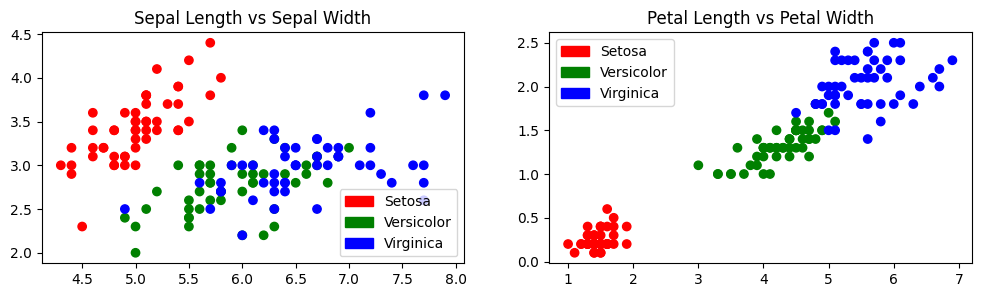

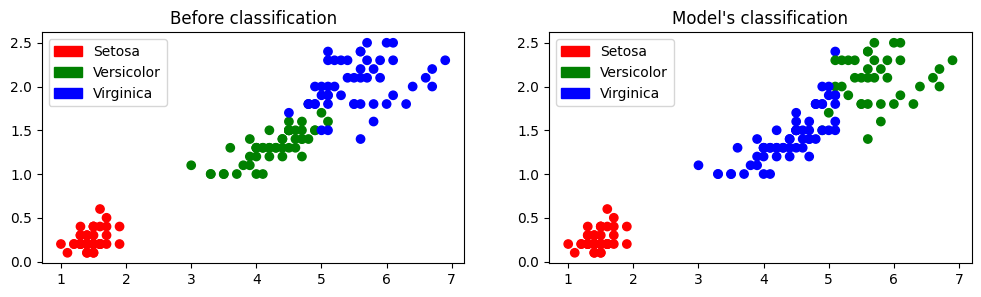

Accuracy: 0.44
Confusion Matrix:
 [[50  0  0]
 [ 0  2 36]
 [ 0 48 14]]


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm

# Load dataset
iris = datasets.load_iris()

# Convert into DataFrame
x = pd.DataFrame(iris.data, columns=['SL','SW','PL','PW'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Visualize data
plt.figure(figsize=(12,3))
colors = np.array(['red','green','blue'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1,2,1)
plt.scatter(x['SL'], x['SW'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['PL'], x['PW'], c=colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

# Train KMeans model
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

# Predictions
predictedY = np.choose(iris_k_mean_model.labels_, [1,0,2]).astype(np.int64)

# Compare before vs after classification
plt.figure(figsize=(12,3))

plt.subplot(1,2,1)
plt.scatter(x['PL'], x['PW'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['PL'], x['PW'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

# Accuracy and Confusion Matrix
print("Accuracy:", sm.accuracy_score(predictedY, y['Target']))
print("Confusion Matrix:\n", sm.confusion_matrix(predictedY, y['Target']))
